Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

It is a classification problem with the  goal of  predicting if the client will subscribe a bank term deposit.


Bussiness/Social Implication
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. 
Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. 

In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. 

As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Objective : Understand the Dataset & cleaif the client will subscribe a bank term deposit
Also fine-tune the hyperparameters & compare the evaluation metrics of various regression algorithms, choose the best model with highest accuracy.

You are provided with following files:

train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit

Attribute Information :

Input variables

bank client data:
age (numeric)
job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means
education : (categorical: 'primary', 'secondary', 'tertiary', 'unknown')
default: has credit in default? (categorical: 'no','yes','unknown')
housing: has housing loan? (categorical: 'no','yes','unknown')
balance : average yearly balance, in euros (numeric)
loan: has personal loan? (categorical: 'no','yes','unknown')
Related with the last contact of the current campaign:¶
contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
day: last contact day of the month (numeric 1 -31)
duration: last contact duration, in seconds (numeric).
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numeric)
poutcome: outcome of the previous marketing campaign (categorical: 'failure','other', 'unknown', 'success')

Output variable (desired target):
target - has the client subscribed a term deposit? (binary: 'yes','no')


Steps to Follow for the Project: The dataset contains 12 features and 158 samples
Below are the steps to follow for the project:

1 :Importing required Libariries
2: Importing the Dataset 
3: Data Cleaning and transforming
4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship
5: Feature Selection/Extraction- to identify the most relevant features
6: Data Preprocessing
7: Predictive Modelling using various algorithms
8: Comparing the models and Model Evaluation
9: Project Outcomes & Conclusion

# 1: Importing required Libraries

In [467]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

In [468]:
# Loading the dataset downloaded from kaggle
deposit_train_dt=pd.read_csv('termdeposit_train.csv')
deposit_test_dt=pd.read_csv('termdeposit_test.csv')

In [469]:
deposit_train_dt.head(10) # Displaying the first 10 records of training dataset

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [470]:
deposit_train_dt['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [471]:
deposit_test_dt.tail(10) # Displaying the last 10 records of testing dataset

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13554,11568,51,unemployed,married,secondary,no,-267,no,yes,unknown,19,jun,208,2,-1,0,unknown
13555,23487,34,management,single,tertiary,no,1070,no,no,cellular,28,aug,91,15,-1,0,unknown
13556,27122,46,self-employed,married,primary,no,3155,yes,no,cellular,21,nov,271,1,-1,0,unknown
13557,837,30,services,single,secondary,no,-174,yes,no,unknown,7,may,113,1,-1,0,unknown
13558,35237,32,technician,single,secondary,no,129,yes,no,cellular,7,may,213,1,-1,0,unknown
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [472]:
deposit_train_dt.columns # to display the columns in the training dataset

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [473]:
deposit_test_dt.columns # to determine the dimension of the testing dataset

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [474]:
deposit_train_dt.info() # displaying the information about the training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [475]:
deposit_test_dt.info() # displaying the information about the testing dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


 Some of the features are not numerical and need to be converted to numerical for proper analysis

# 3: Data Cleaning and Transfroming

In [476]:
deposit_train_dt.shape # to determine the dimension of the training dataset

(31647, 18)

In [477]:
deposit_test_dt.shape # to determine the dimension of the training dataset

(13564, 17)

In [478]:
# Checking for missing values for Training dataset
deposit_train_dt.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [479]:
# Checking for missing values for Testing dataset
deposit_test_dt.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

We can infer that there is no missing values from both training and testing dataset and the dataset is appropriate for the prediction

In [480]:
# Convert Y,Housing,default,loan column into integer
deposit_train_dt['default'] = deposit_train_dt['default'].apply(lambda row: 1 if row == 'yes' else 0)
deposit_test_dt['default'] = deposit_train_dt['default'].apply(lambda row: 1 if row == 'yes' else 0)
deposit_train_dt['housing'] = deposit_train_dt['housing'].apply(lambda row: 1 if row == 'yes' else 0)
deposit_test_dt['housing'] = deposit_train_dt['housing'].apply(lambda row: 1 if row == 'yes' else 0)
deposit_train_dt['loan'] = deposit_train_dt['loan'].apply(lambda row: 1 if row == 'yes' else 0)
deposit_test_dt['loan'] = deposit_train_dt['loan'].apply(lambda row: 1 if row == 'yes' else 0)
deposit_train_dt['subscribed'] = deposit_train_dt['subscribed'].apply(lambda row: 1 if row == 'yes' else 0)
deposit_test_dt['subscribed'] = deposit_train_dt['subscribed'].apply(lambda row: 1 if row == 'yes' else 0)

In [481]:
# Converting job to Integer
emb = {'admin':0, 'unknown':1, 'services':2,'management':3,'technician':4,'retired':5,'blue-collar':6,'housemaid':7,'self-employed':7,'student':8,'entrepreneur':9,'unemployed':10}
deposit_train_dt['job'] = deposit_train_dt['job'].map(emb)
deposit_test_dt['job'] = deposit_train_dt['job'].map(emb)
deposit_train_dt['job'].unique()


array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [482]:
deposit_train_dt['job']=deposit_train_dt['job'].replace(np.nan,1.0) # replacing the null values for Embarked with S
deposit_test_dt['job']=deposit_train_dt['job'].replace(np.nan,1.0) # replacing the null values for Embarked with S
deposit_train_dt['job'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [483]:
#married', 'divorced', 'single'
# Converting marital to Integer
emb = {'married':0, 'divorced':1, 'single':2}
deposit_train_dt['marital'] = deposit_train_dt['marital'].map(emb)
deposit_test_dt['marital'] = deposit_train_dt['marital'].map(emb)
deposit_train_dt['marital'].unique()

array([0, 1, 2], dtype=int64)

In [484]:
#unknown', 'secondary', 'tertiary', 'primary'
# Converting education to Integer
emb = {'unknown':0, 'primary':1, 'secondary':2,'tertiary':3}
deposit_train_dt['education'] = deposit_train_dt['education'].map(emb)
deposit_test_dt['education'] = deposit_train_dt['education'].map(emb)
deposit_train_dt['education'].unique()

array([0, 2, 3, 1], dtype=int64)

In [485]:
#'telephone', 'cellular', 'unknown'
# Converting contact to Integer
emb = {'unknown':0, 'cellular':1, 'telephone':2}
deposit_train_dt['contact'] = deposit_train_dt['contact'].map(emb)
deposit_test_dt['contact'] = deposit_train_dt['contact'].map(emb)
deposit_train_dt['contact'].unique()

array([2, 1, 0], dtype=int64)

In [486]:
# Converting months to numeric
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
deposit_train_dt['month'] = deposit_train_dt['month'].map(months)
deposit_test_dt['month'] = deposit_train_dt['month'].map(months)
deposit_train_dt.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,1.0,0,0,0,1933,0,0,2,19,11,44,2,-1,0,unknown,0
1,40576,31,1.0,0,2,0,3,0,0,1,20,7,91,2,-1,0,unknown,0
2,15320,27,2.0,0,2,0,891,1,0,1,18,7,240,1,-1,0,unknown,0
3,43962,57,3.0,1,3,0,3287,0,0,1,22,6,867,1,84,3,success,1
4,29842,31,4.0,0,2,0,119,1,0,1,4,2,380,1,-1,0,unknown,0


In [487]:
deposit_train_dt.describe() # Performing Descriptive Statistical Analysis on the  Features

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,4.325560,0.678548,2.058931,0.018485,1363.890258,0.555629,0.162132,0.774702,15.835466,6.146839,258.113534,2.765697,39.576042,0.574272,0.117389
std,13075.936990,10.625134,2.278449,0.884302,0.780034,0.134700,3028.304293,0.496904,0.368578,0.551283,8.337097,2.406218,257.118973,3.113830,99.317592,2.422529,0.321888
min,2.000000,18.000000,1.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11218.000000,33.000000,3.000000,0.000000,2.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22519.000000,39.000000,4.000000,0.000000,2.000000,0.000000,450.000000,1.000000,0.000000,1.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33879.500000,48.000000,6.000000,2.000000,3.000000,0.000000,1431.000000,1.000000,0.000000,1.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,10.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


The above table shows that there are outliers in the 'duration' column because the difference between the inter-quartile range (values between Q1and Q3) and the maximum value (4918) is extremely large.

In [488]:
deposit_test_dt.describe() # Performing Descriptive Statistical Analysis on the  Features

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
count,13564.000000,13564.000000,13564.000000,0.0,0.0,13564.0,13564.000000,13564.0,13564.0,0.0,13564.000000,0.0,13564.000000,13564.000000,13564.000000,13564.000000,13564.0
mean,22704.057726,40.887128,4.298068,NaN,NaN,0.0,1358.496535,0.0,0.0,NaN,15.738646,NaN,258.278679,2.759510,41.648555,0.594441,0.0
std,12994.043329,10.604108,2.269596,NaN,NaN,0.0,3082.940623,0.0,0.0,NaN,8.288174,NaN,258.488648,3.060928,101.985178,1.998193,0.0
min,1.000000,18.000000,1.000000,NaN,NaN,0.0,-3313.000000,0.0,0.0,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,0.0
25%,11546.000000,33.000000,3.000000,NaN,NaN,0.0,71.000000,0.0,0.0,NaN,8.000000,NaN,102.000000,1.000000,-1.000000,0.000000,0.0
50%,22782.000000,39.000000,4.000000,NaN,NaN,0.0,445.000000,0.0,0.0,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,0.0
75%,33974.250000,48.000000,6.000000,NaN,NaN,0.0,1413.250000,0.0,0.0,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,0.0
max,45206.000000,95.000000,10.000000,NaN,NaN,0.0,98417.000000,0.0,0.0,NaN,31.000000,NaN,3253.000000,58.000000,850.000000,55.000000,0.0


# 4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship

# 4.1Univarite Analysis

In [489]:
# Determine the unique values for each region
subscribe_rate = deposit_train_dt["subscribed"].value_counts()
subscribe_rate

0    27932
1     3715
Name: subscribed, dtype: int64

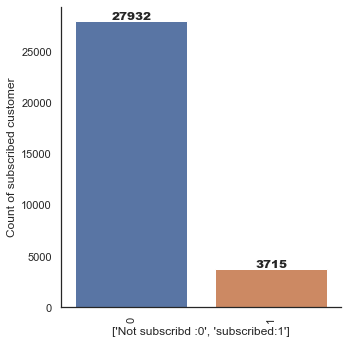

In [490]:
labels = ['Not subscribd :0','subscribed:1']
sns.catplot(x = 'subscribed', data = deposit_train_dt , kind = 'count',margin_titles =False) # plotting the survival rate
for index,value in enumerate(deposit_train_dt["subscribed"].value_counts()):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")
    plt.xlabel(labels)
    plt.ylabel("Count of subscribed customer")
    #plt.bar(Status,Width = 0.5)
    plt.xticks(rotation = 90)

                           Target Variable Distribution                          


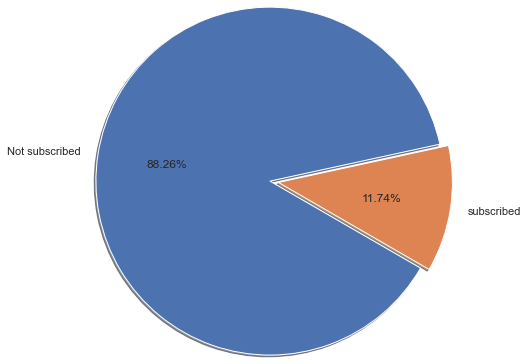

In [491]:
labels = ['Not subscribed','subscribed']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(85))
plt.pie(deposit_train_dt['subscribed'].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

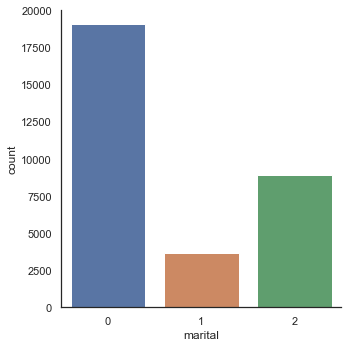

In [492]:
#Analysis of Marital Status
sns.set(style="white")
sns.catplot(x = 'marital', data = deposit_train_dt , kind = 'count',margin_titles =False)

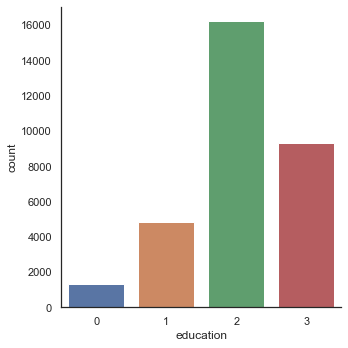

In [493]:
#Analysis of Education Status
sns.set(style="white")
sns.catplot(x = 'education', data = deposit_train_dt , kind = 'count',margin_titles =False)

# 4.2 Bivarite Analysis

In [494]:
# function to Visualizing Categorical values using Box plot
def features_plot(Categorical_column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=['job', 'marital', 'education', 'month']
    sns.countplot(x=Categorical_column,hue='subscribed', data=deposit_train_dt)
    plt.title(f"{Categorical_column.title()} vs subscribed rate",fontweight="black",size=25,pad=10,)
    plt.legend(title='subscribed', loc='upper right', labels=['No', 'Yes'])
    col_values = deposit_train_dt[Categorical_column].value_counts()
    plt.tight_layout()

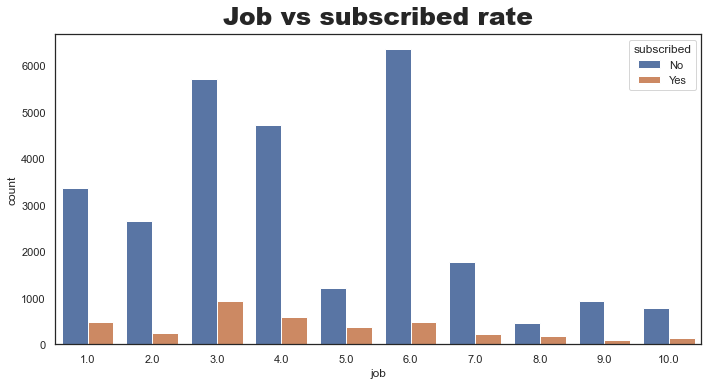

In [495]:
features_plot("job") # Calling function features_plot to plot age against subscribed
# {unknown':1, 'services':2,'management':3,'technician':4,'retired':5,'blue-collar':6,'housemaid':7,'self-employed':7,'student':8,'entrepreneur':9,'unemployed':10}

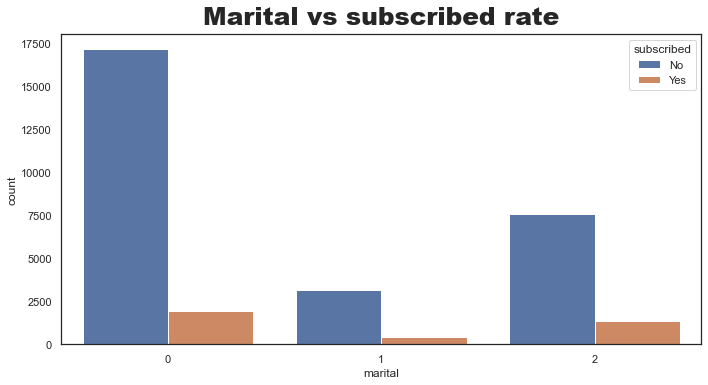

In [496]:
features_plot("marital") # Calling function features_plot to plot marital against subscribed
# {'married':0, 'divorced':1, 'single':2}

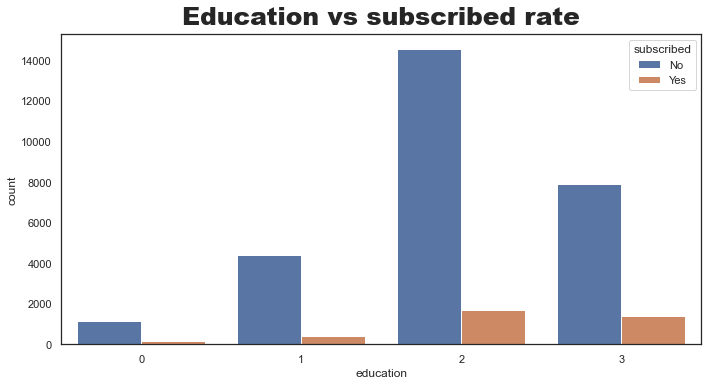

In [497]:
features_plot("education") # Calling function features_plot to plot education against subscribed
# {'unknown':0, 'primary':1, 'secondary':2,'tertiary':3}

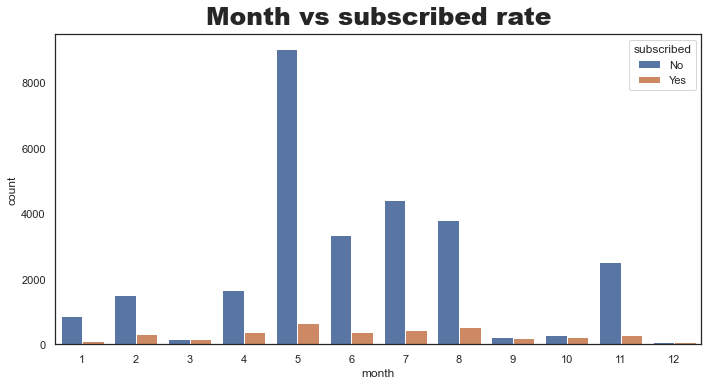

In [498]:
features_plot("month") # Calling function features_plot to plot marital against subscribed

# 4.3 Multivarite Analysis

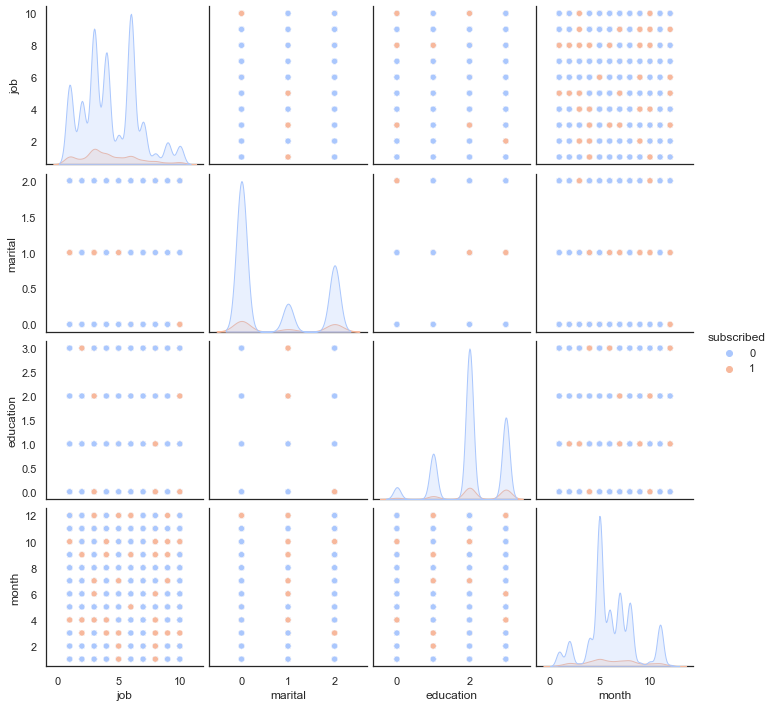

In [499]:
#Pairplot of all numerical variables
sns.pairplot(deposit_train_dt, vars=['job', 'marital', 'education', 'month'],hue='subscribed',palette="coolwarm")
plt.show()

# 5: Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

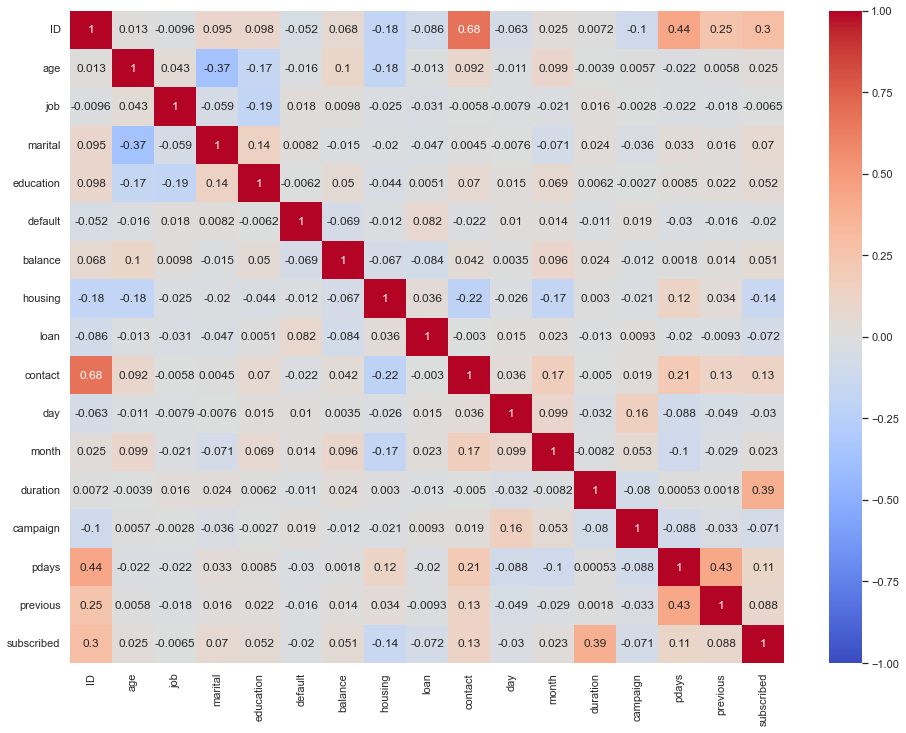

In [500]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(deposit_train_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=deposit_train_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit

# 6: Data Preprocessing

In [501]:
# Separating feature data and Label data
X = deposit_train_dt.drop(['subscribed','poutcome','marital','education','month','contact'],axis=1) # drop column charges
y = deposit_train_dt['subscribed']

In [502]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((25317, 12), (6330, 12), (25317,), (6330,))

# 7: Predictive Modelling using various algorithms

In [503]:
# Using Logistic Regression
lreg=LogisticRegression(multi_class='multinomial', solver='newton-cg')
lreg.fit(X_train,y_train)  # Training the Model

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [504]:
lreg_pred = lreg.predict(X_val)  # Predict Test data
lreg_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [505]:
print('Accuracy',round(accuracy_score(y_val,lreg_pred)*100,2))
print('Error Rate',(1 - accuracy_score(y_val,lreg_pred))*100)

Accuracy 89.27
Error Rate 10.726698262243284


In [506]:
# Using Decsion tree classifier
DT=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4, max_features='sqrt',min_samples_leaf=7, random_state=42, splitter='random')

In [507]:
#fitting the model
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=7, random_state=42, splitter='random')

In [508]:
#making predictions on the validation set
DT_pred = DT.predict(X_val)
DT_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [509]:
print('Accuracy',round(accuracy_score(y_val,DT_pred)*100,2))
print('Error Rate',(1 - accuracy_score(y_val,DT_pred))*100)

Accuracy 88.12
Error Rate 11.879936808846757


In [510]:
# Support Vector Classifier
svm=SVC(kernel='rbf',random_state=1)

In [511]:
svm.fit(X_train,y_train)

SVC(random_state=1)

In [512]:
svm_pred = svm.predict(X_val)
svm_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [513]:
print('Accuracy',round(accuracy_score(y_val,svm_pred)*100,2))
print('Error Rate',(1 - accuracy_score(y_val,svm_pred))*100)

Accuracy 88.12
Error Rate 11.879936808846757


In [514]:
# K-Neighbour Classifier
knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan') # create instance of K-neighbor classifier

In [515]:
knn.fit(X_train,y_train) #  Training the model 


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [516]:
knn_pred = km.predict(X_val)
knn_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [517]:
print('Accuracy',round(accuracy_score(y_val,knn_pred)*100,2))
print('Error Rate',(1 - accuracy_score(y_val,knn_pred))*100)

Accuracy 88.67
Error Rate 11.327014218009479


In [518]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=15)

In [519]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

In [520]:
clf_pred = clf.predict(X_val)
clf_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [521]:
print('Accuracy',round(accuracy_score(y_val,clf_pred)*100,2))
print('Error Rate',(1 - accuracy_score(y_val,clf_pred))*100)

Accuracy 90.25
Error Rate 9.747235387045816


In [522]:
# Using XGboost Model
gbc = GradientBoostingClassifier(n_estimators=80,learning_rate=.05,max_depth = 3)

In [523]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=80)

In [524]:
gbc_pred = gbc.predict(X_val)
gbc_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [525]:
print('Accuracy',round(accuracy_score(y_val,gbc_pred)*100,2))
print('Error Rate',(1 - accuracy_score(y_val,gbc_pred))*100)

Accuracy 90.51
Error Rate 9.494470774091624


# 8: Comparing the models and Model Evaluation

# 8.1 Best Features for the Models

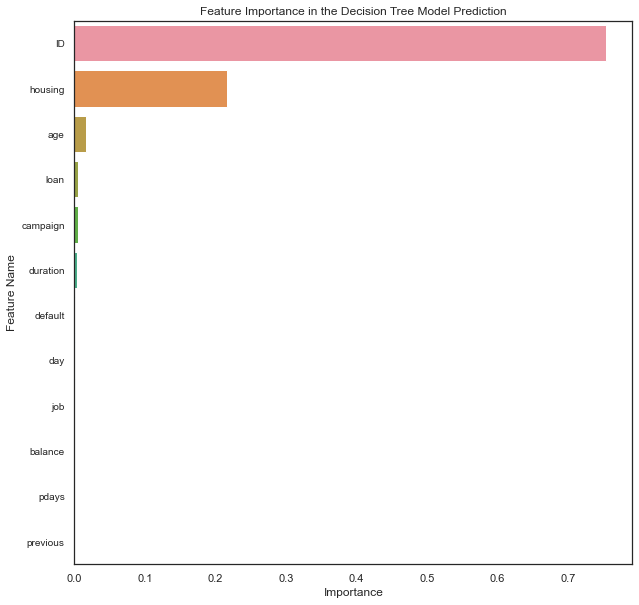

In [526]:
# Decision Tree best Features
imp_df = pd.DataFrame({"Feature Name":X.columns,"Importance":DT.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Decision Tree Model Prediction")
plt.yticks(size=10)
plt.show()

According to decision tree classifier, housing is important to the model

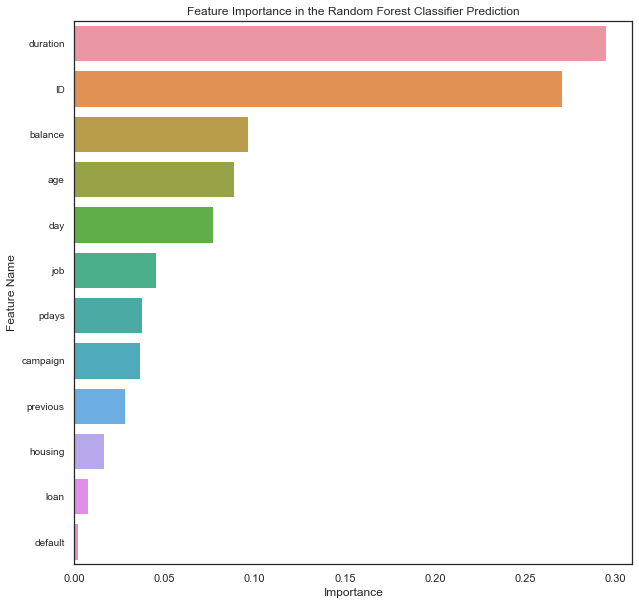

In [527]:
#  Random Forest Classifier
imp_df = pd.DataFrame({"Feature Name":X.columns,"Importance":clf.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Random Forest Classifier Prediction")
plt.yticks(size=10)
plt.show()

According to Random Forest classifier, duration, balance, age , day and job are  important to the model

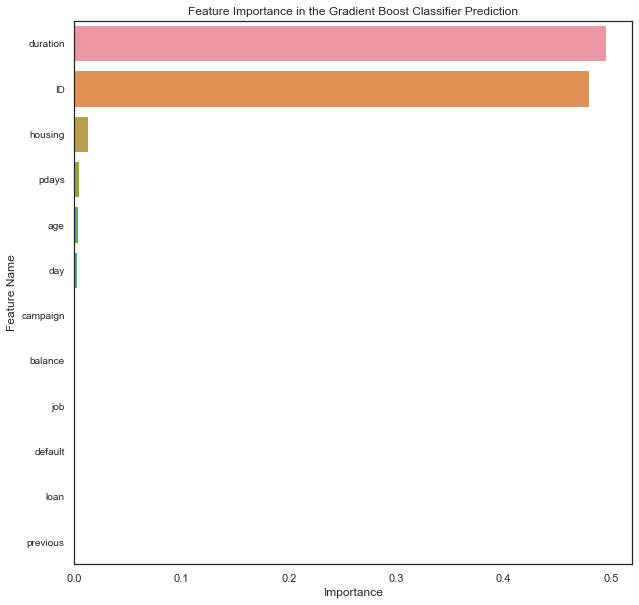

In [528]:
# Gradient Boost Classfier
imp_df = pd.DataFrame({"Feature Name":X.columns,"Importance":gbc.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Gradient Boost Classifier Prediction")
plt.yticks(size=10)
plt.show()

In [529]:
# Results
models_metrics = pd.DataFrame([
    ["Logistic Regression Model", round(accuracy_score(y_val,lreg_pred)*100,2)],
    ["DecisionTreeClassifier",round(accuracy_score(y_val,DT_pred)*100,2)],
    ["Support Vector Classifier", round(accuracy_score(y_val,svm_pred)*100,2)],
    ["K-Neighbour Classifier", round(accuracy_score(y_val,knn_pred)*100,2)],
    ["Random Forest Classifier", round(accuracy_score(y_val,clf_pred)*100,2)],
    ["Gradientboost Classifier", round(accuracy_score(y_val,gbc_pred)*100,2)]
])
models_metrics.columns= ["Model","Accuracy"]
models_metrics.set_index("Model")
models_metrics

,Model,Accuracy
0,Logistic Regression Model,89.27
1,DecisionTreeClassifier,88.12
2,Support Vector Classifier,88.12
3,K-Neighbour Classifier,88.67
4,Random Forest Classifier,90.25
5,Gradientboost Classifier,90.51


The best model is Random Forest Classifier with percentage of 90.68, so we can going to hypertune the model

# 8.2 Testing the Model

In [530]:
test=deposit_test_dt.drop(['poutcome','marital','education','month','contact','subscribed'],axis=1)
test.head(5)

,ID,age,job,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,38441,32,1.0,0,118,0,0,15,20,6,-1,0
1,40403,78,1.0,0,2787,0,0,1,372,1,-1,0
2,3709,31,2.0,0,144,0,0,16,676,1,-1,0
3,37422,57,3.0,0,3777,0,0,13,65,2,-1,0
4,12527,45,4.0,0,-705,0,0,3,111,1,-1,0


In [531]:
# Let us make prediction based on decsion tree
test_pred = gbc.predict(test)
test_pred


array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [532]:
output = pd.DataFrame()

In [533]:
output['ID'] = deposit_test_dt['ID']
output['subscribed'] = test_pred

In [534]:
output['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

In [535]:
output.to_csv('submission file.csv', header=True, index=False)

In [536]:
# Loading the dataset downloaded from kaggle
output_dt=pd.read_csv('submission file.csv')
output_dt.tail(5)

,ID,subscribed
13559,23465,0
13560,11743,0
13561,28292,0
13562,45163,1
13563,34839,0
